# House Pricing Analysis & Prediction

# Team Members

| Name  | Student ID | Steps Performed |
| :- | -: | :- |
| Sai Kumar Adulla   | C0863741 | Data Selection, Feature Engineering and GitHub Repository |
| Jenny Jitender Joshi | C0862907 | Data Cleaning, Data Exploration and Flask Web Application |
| Kanika Kataria  | C0866652 | Data Exploration, Feature Engineering and Flask Web Application |
| Christin Paul | C0863254 | Feature Engineering, Model Selection and GitHub Repository|
| Abbas Ismail | C0867092 | Hyperparameter Tuning, Pickle Files and Cloud Deployment |


## Importing All Dependencies & Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore')

# Why we selected this particular dataset?

- **Real-world Relevance:**
  - Focus on Bangalore real estate market.
  - Practical applications for investors and homebuyers.
<p></p>

- **Data Size and Diversity:**
  - 13,320 records with diverse features.
  - Includes area type, availability, location, size, society, etc.
<p></p>

- **Prediction Challenge:**
  - Complex relationships influence property prices.
  - Challenging problem for predictive modeling.
<p></p>

- **Data Quality Issues:**
  - Null values in multiple columns.
  - Reflects real-world data scenarios.
<p></p>

- **Economic Indicators:**
  - Property prices as indicators of economic health.
  - Insights into regional economic trends.
<p></p>

- **Practical Significance:**
  - Impacts real estate developers, investors, individuals.
  - Decision-making aid in property transactions.
<p></p>

- **Interdisciplinary Aspect:**
  - Combines data analysis, cleaning, and predictive modeling.
  - Applies skills in statistics, machine learning, and domain knowledge.
<p></p>

- **Data Types:**
  - Mix of categorical and numerical data.
  - Diverse techniques for preprocessing and modeling.
<p></p>

- **Data Exploration Opportunities:**
  - Variety of features for exploratory data analysis.
  - Uncover patterns, trends, and correlations.
<p></p>

- **Potential Business Impact:**
  - Predicting property prices influences decisions.
  - Significant impact on business and investment strategies.


In [3]:
house=pd.read_csv('House Prices.csv')

# Output a message indicating the dataset for house pricing
print("House Pricing Dataset:")

# Display the contents of the dataset using the 'display' function
display(house)

House Pricing Dataset:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Reviewing the Dataset

In [4]:
# Print a message displaying the counts of null values
print("Null Value Counts:")

# Use the 'isnull().sum()' method to show the sum of null values for each column in the 'house' dataset
display(house.isnull().sum())

Null Value Counts:


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
# Print a message providing a description of the dataset
print("Dataset Description:")

# Use the 'describe()' method to display the statistical summary of the 'house' dataset
display(house.describe())

Dataset Description:


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
# Print a message conveying dataset information
print("Dataset Information:")

# Utilize the 'info()' method to showcase the information summary of the 'house' dataset
display(house.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


None

In [7]:
# Displaying the value counts for each column in the 'house' dataset
print("Checking the Value Counts of Each Column:")
for column in house.columns:
    print(house[column].value_counts())
    print('*' * 30)

Checking the Value Counts of Each Column:
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
******************************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
******************************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, 

# Data Cleaning

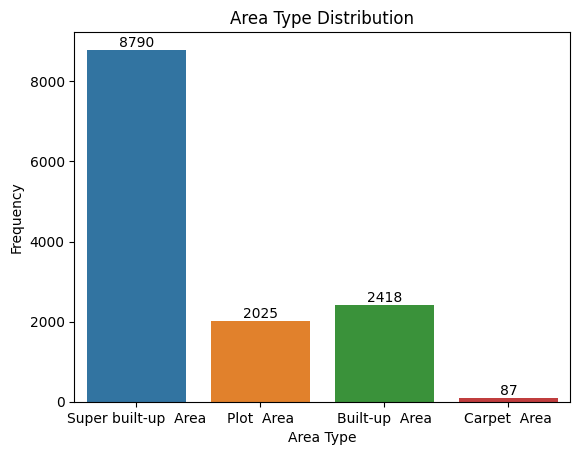

In [8]:
# Visualizing the distribution of 'area_type' in the 'house' dataset using seaborn
ax = sns.countplot(x="area_type", data=house)

# Adding labels to display frequencies on the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Adding axis labels and title
plt.xlabel("Area Type")
plt.ylabel("Frequency")
plt.title("Area Type Distribution")

# Display the plot
plt.show()

In [9]:
# Filling null values in the 'size' column with '2 BHK'
house['size'] = house['size'].fillna('2 BHK')

# Displaying the count of null values in the 'size' column after filling
print("Filling Null Values in Size:")
display(house['size'].isnull().sum())

Filling Null Values in Size:


0

In [10]:
# Extracting the numerical part of the 'size' column and converting it to integer
house['size'] = house['size'].str.split().str.get(0).astype(int)

# Displaying the value counts after separating and converting to int
print("Separating the Numerical Part of Size Column & Converting It to Integer:")
display(house['size'].value_counts())

Separating the Numerical Part of Size Column & Converting It to Integer:


size
2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

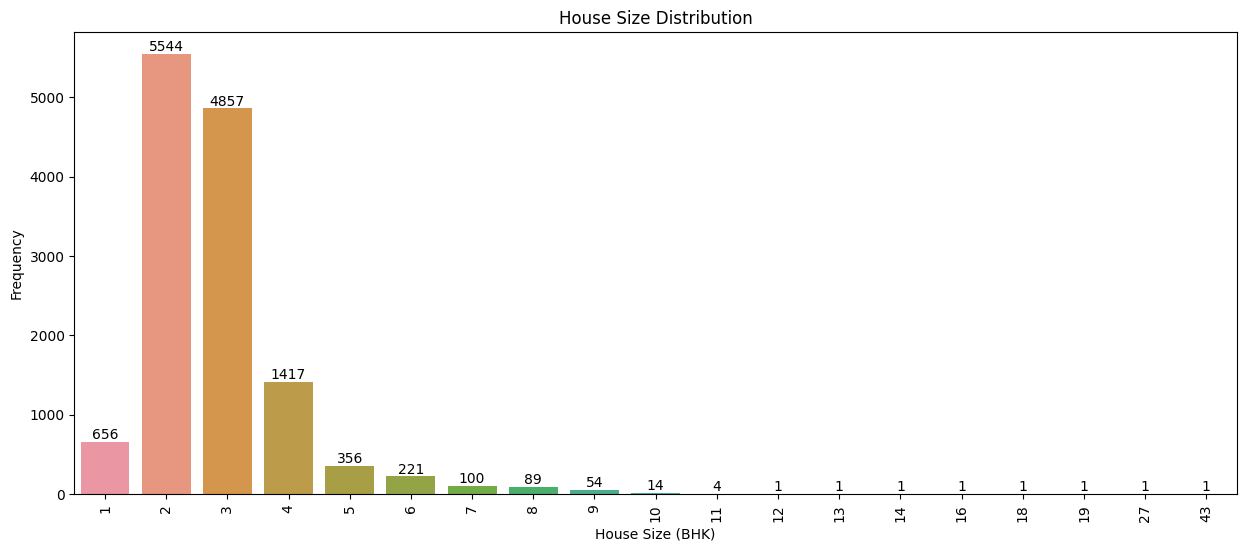

In [11]:
# Setting the figure size
plt.figure(figsize=(15, 6))

# Creating a count plot for the 'size' column in the 'house' dataset using seaborn
ax = sns.countplot(x="size", data=house)

# Adding labels to display frequencies on the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Adding axis labels, rotation, and title
plt.xlabel("House Size (BHK)")
plt.xticks(rotation="vertical")
plt.ylabel("Frequency")
plt.title("House Size Distribution")

# Displaying the plot
plt.show()

In [12]:
# Filling null values in the 'bath' column with the median value
print("Filling Null Values of Bath:")
house['bath'] = house['bath'].fillna(house['bath'].median())

# Displaying the 'bath' column after filling null values
display(house["bath"])
print()

# Displaying the count of null values in the 'bath' column
print("Null Value Count in Bath:")
display(house['bath'].isnull().sum())

Filling Null Values of Bath:


0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64


Null Value Count in Bath:


0

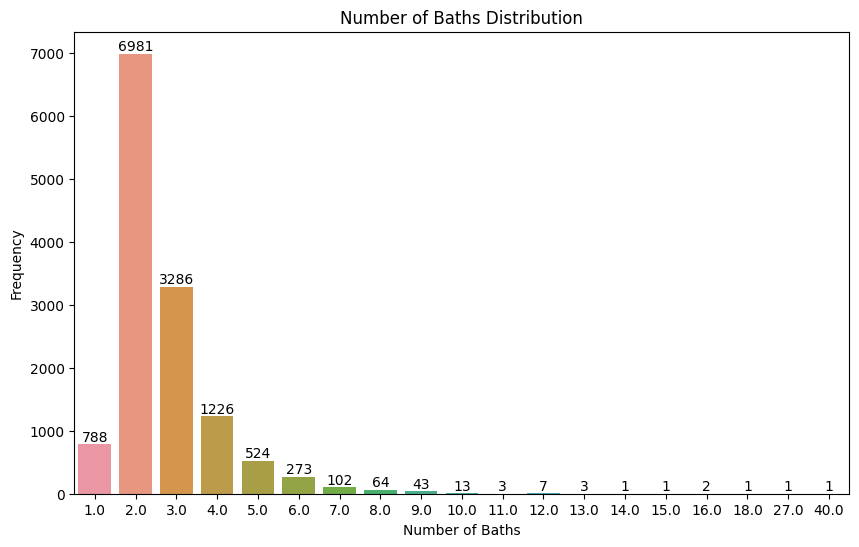

In [13]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a count plot for the 'bath' column in the 'house' dataset using seaborn
ax = sns.countplot(x="bath", data=house)

# Adding labels to display frequencies on the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Adding axis labels and title
plt.xlabel("Number of Baths")
plt.ylabel("Frequency")
plt.title("Number of Baths Distribution")

# Displaying the plot
plt.show()

In [14]:
# Filling null values in the 'balcony' column with the value 2
house['balcony'] = house['balcony'].fillna(2)

# Displaying the count of null values in the 'balcony' column after filling
print("Filling Nulls in the Balcony Column:")
display(house['balcony'].isnull().sum())

Filling Nulls in the Balcony Column:


0

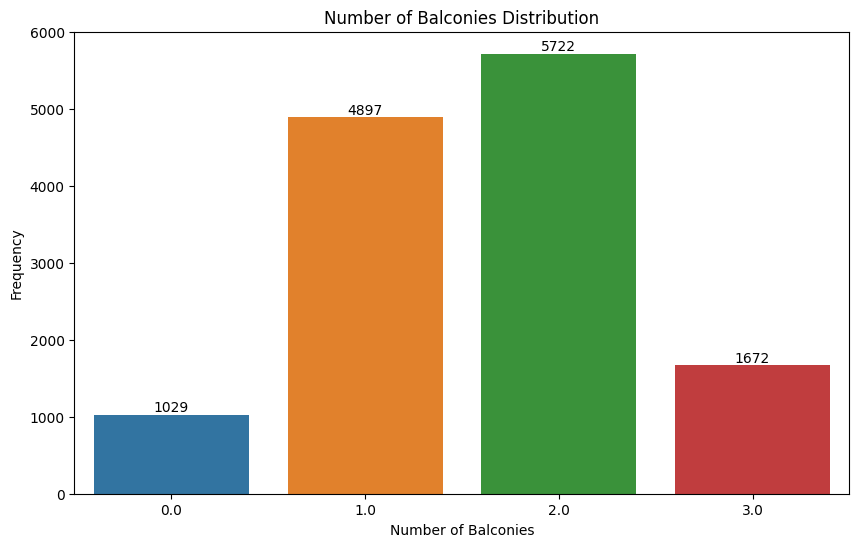

In [15]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a count plot for the 'balcony' column in the 'house' dataset using seaborn
ax = sns.countplot(x="balcony", data=house)

# Adding labels to display frequencies on the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Adding axis labels and title
plt.xlabel("Number of Balconies")
plt.ylabel("Frequency")
plt.title("Number of Balconies Distribution")

# Displaying the plot
plt.show()

In [16]:
# Filling null values in the 'location' column with the string 'Sarjapur Road'
house['location'] = house['location'].fillna('Sarjapur Road')

# Displaying the count of null values in the 'location' column after filling
print("Filling Nulls in Location Column:")
display(house['location'].isnull().sum())

Filling Nulls in Location Column:


0

# Data Exploration

In [17]:
# Removing unnecessary white spaces in the 'location' column using the 'strip()' method
house['location'] = house['location'].apply(lambda x: x.strip())

# Displaying the value counts after removing unnecessary white spaces
print("Removing Unnecessary White Spaces in Location Column:")
display(house["location"].value_counts())

Removing Unnecessary White Spaces in Location Column:


location
Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: count, Length: 1295, dtype: int64

In [18]:
# Removing unnecessary white spaces in the 'location' column using the 'strip()' method
house["location"] = house["location"].apply(lambda x: x.strip())

# Grouping by 'location' and counting occurrences, then sorting in descending order
location_num = house.groupby('location')['location'].agg('count').sort_values(ascending=False)

# Displaying the count of occurrences for each 'location'
display(location_num)

location
Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1295, dtype: int64

In [19]:
# Filtering locations with a frequency less than or equal to 10
location_less_10 = location_num[location_num <= 10]

# Displaying locations with a frequency less than 10
print("Locations with Frequency Less Than 10:")
display(location_less_10)

Locations with Frequency Less Than 10:


location
Naganathapura            10
1st Block Koramangala    10
Ganga Nagar              10
Sector 1 HSR Layout      10
Dairy Circle             10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1054, dtype: int64

In [20]:
# Replacing locations with 'other' if their frequency is less than 10
house['location'] = house['location'].apply(lambda x: 'other' if x in location_less_10 else x)

# Displaying the value counts after replacing locations with 'other'
print("Replacing the Locations with 'Other' Tag if Their Frequency Is Less Than 10:")
display(house['location'].value_counts())

Replacing the Locations with 'Other' Tag if Their Frequency Is Less Than 10:


location
other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [21]:
# Checking the count of null values after initial preprocessing
print("Checking Null Value Counts After Initial Preprocessing:")
display(house.isnull().sum())

Checking Null Value Counts After Initial Preprocessing:


area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [22]:
# Dropping unnecessary columns: 'society', 'availability', 'area_type'
house.drop(columns=['society', 'availability', 'area_type'], inplace=True)

# Displaying information about the dataset after dropping columns
print("Dropping Unnecessary Columns:")
display(house.info())

Dropping Unnecessary Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  int32  
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), int32(1), object(2)
memory usage: 572.5+ KB


None

# Feature Engineering

In [23]:
# Replacing range values with the average between the two given range points
def convert_sqft_to_num(x):
    t = x.split('-')
    if len(t) == 2:
        return (float(t[0]) + float(t[1])) / 2
    try:
        return float(x)
    except:
        return None

# Applying the conversion function to the 'total_sqft' column and dropping rows with NaN values
house['total_sqft'] = house['total_sqft'].apply(convert_sqft_to_num)
house = house.dropna()

# Displaying unique values in the 'total_sqft' column after the conversion
display(house['total_sqft'].unique())

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

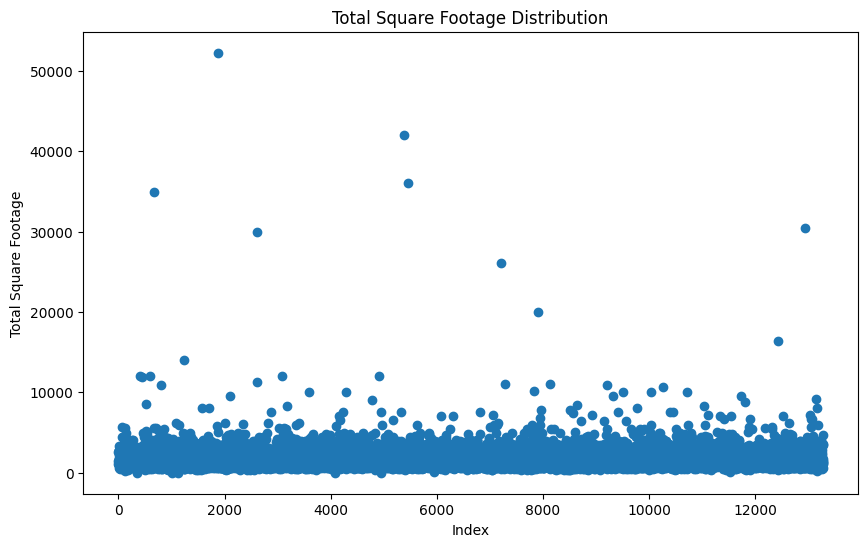

In [24]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a scatter plot for the 'total_sqft' column
plt.scatter(range(len(house["total_sqft"])), house["total_sqft"])

# Adding axis labels and title
plt.xlabel("Index")
plt.ylabel("Total Square Footage")
plt.title("Total Square Footage Distribution")

# Displaying the plot
plt.show()

In [25]:
# Creating a new column 'price_per_sqft' by calculating the price per square foot
house['price_per_sqft'] = house['price'] * 100000 / house['total_sqft']

# Displaying the 'price_per_sqft' column
print("Making a New Column 'Price per Square Feet':")
display(house['price_per_sqft'])

Making a New Column 'Price per Square Feet':


0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13274, dtype: float64

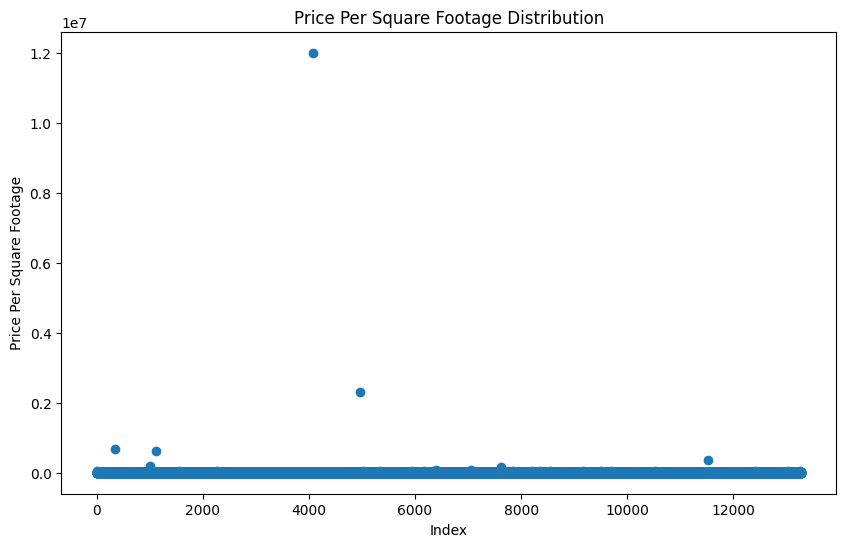

In [26]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a scatter plot for the 'price_per_sqft' column
plt.scatter(range(len(house["price_per_sqft"])), house["price_per_sqft"])

# Adding axis labels and title
plt.xlabel("Index")
plt.ylabel("Price Per Square Footage")
plt.title("Price Per Square Footage Distribution")

# Displaying the plot
plt.show()

In [27]:
# Printing a message indicating the description of the new dataset after addressing anomalies
print("New Dataset Description with Anomalies Addressed:")

# Displaying the statistical summary of the 'house' dataset
display(house.describe())

New Dataset Description with Anomalies Addressed:


,size,total_sqft,bath,balcony,price,price_per_sqft
count,13274.000000,13274.000000,13274.000000,13274.000000,13274.000000,1.327400e+04
mean,2.801718,1559.626694,2.687359,1.604565,112.453654,7.907501e+03
std,1.291591,1238.405258,1.336158,0.802569,149.070368,1.064296e+05
min,1.000000,1.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,1.000000,50.000000,4.266865e+03
50%,3.000000,1276.000000,2.000000,2.000000,72.000000,5.434306e+03
75%,3.000000,1680.000000,3.000000,2.000000,120.000000,7.311746e+03
max,43.000000,52272.000000,40.000000,3.000000,3600.000000,1.200000e+07


In [28]:
# Printing a message indicating the check for total square feet per size
print("Checking Total Square Feet per Size:")

# Displaying the statistical summary of the ratio of total square feet to size
display((house['total_sqft'] / house['size']).describe())

Checking Total Square Feet per Size:


count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

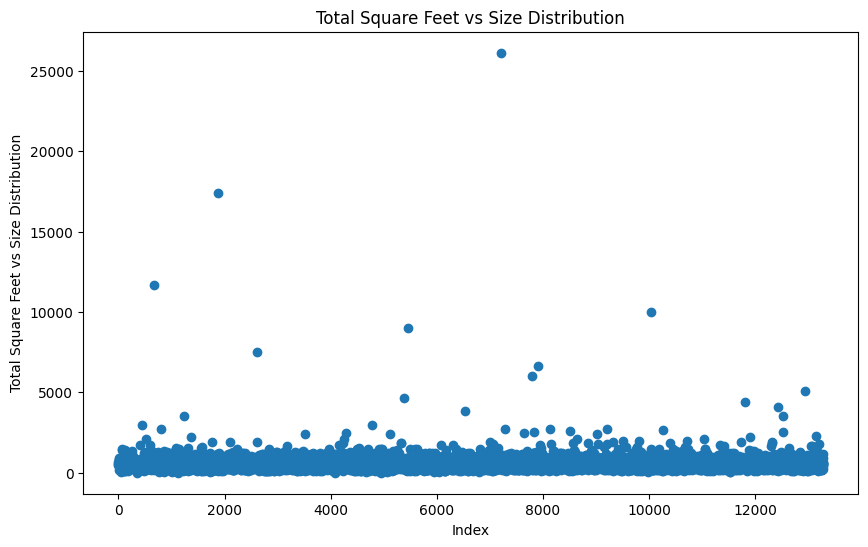

In [29]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a scatter plot for the ratio of total square feet to size
plt.scatter(range(len(house["total_sqft"])), house["total_sqft"] / house['size'])

# Adding axis labels and title
plt.xlabel("Index")
plt.ylabel("Total Square Feet vs Size Distribution")
plt.title("Total Square Feet vs Size Distribution")

# Displaying the plot
plt.show()

In [30]:
# Selecting houses where the size is greater than or equal to 300 square feet per bedroom
print("Selecting Houses with Size Greater Than or Equal to 300 Square Feet per Bedroom:")
house = house[(house['total_sqft'] / house['size']) >= 300]

# Displaying the statistical summary of the updated 'house' dataset
display(house.describe())

Selecting Houses with Size Greater Than or Equal to 300 Square Feet per Bedroom:


,size,total_sqft,bath,balcony,price,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,2.650838,1594.564544,2.559537,1.604629,111.382401,6303.979357
std,0.976678,1261.271296,1.077938,0.796238,152.077329,4162.237981
min,1.000000,300.000000,1.000000,0.000000,8.440000,267.829813
25%,2.000000,1116.000000,2.000000,1.000000,49.000000,4210.526316
50%,3.000000,1300.000000,2.000000,2.000000,70.000000,5294.117647
75%,3.000000,1700.000000,3.000000,2.000000,115.000000,6916.666667
max,16.000000,52272.000000,16.000000,3.000000,3600.000000,176470.588235


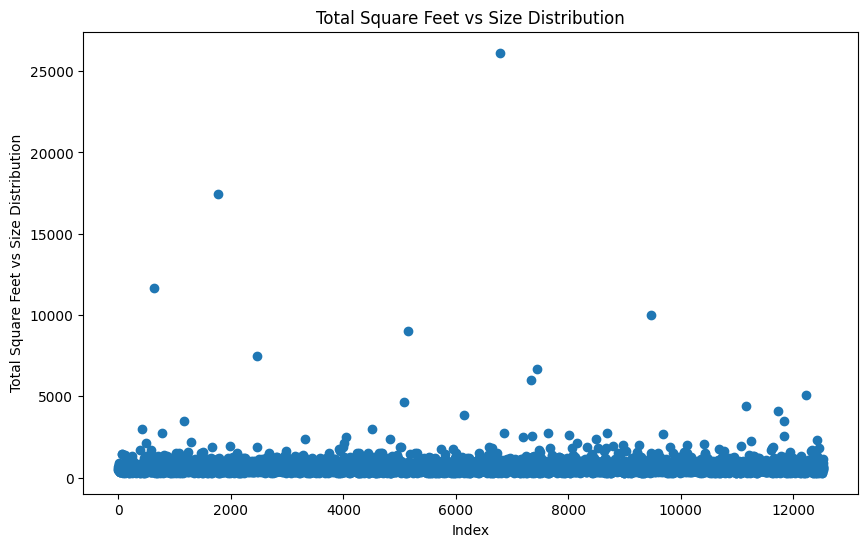

In [31]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a scatter plot for the ratio of total square feet to size after filtering
plt.scatter(range(len(house["total_sqft"])), house["total_sqft"] / house['size'])

# Adding axis labels and title
plt.xlabel("Index")
plt.ylabel("Total Square Feet vs Size Distribution")
plt.title("Total Square Feet vs Size Distribution")

# Displaying the plot
plt.show()